# Machine Learning in Conservation
<B>Northeast Natural History Conference</B>
<B>April 14, 2018</B>
<I>Larry Clarfeld</I>

The use of Machine Learning has become more prevalant in many fields and professions in recent years. The gain in popularity is fueled in part by the increased ease-of-use. These scripts will impliment some very simple scenarios that appear in the talk to demonstrate what it would look like to use machine learning techniques in Python using some standard toolkits.

In [1]:
# Here, we are importing packages we will use

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

%matplotlib inline

# Cricket Data

It has been well known for over a century that the rate that a cricket chirps can be used to tell the temperature. Here, we use machine learning to make such predictions and explore several machine learning concepts. Let's start by plotting our data. This is the information we'll use to train our machine learning model.

In [2]:
# Data Source: http://mste.illinois.edu/patel/amar430/keyprob1.html
# temp: degrees (F)
# chirp: Number of chirps in 15 seconds  

temp = [89,72,93,84,81,75,70,82,69,83,80,83,81,84]
chirp = [20,16,20,18,17,16,15,17,15,16,15,17,16,17]

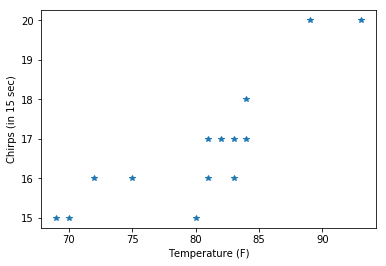

In [3]:
# Plot the data
plt.plot(temp,chirp,'*')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (in 15 sec)')

As expected, there is a <B>positive correlation</B> between temperature and chirp-rate. We will try fitting the data to polynomial functions of varying degrees. Each polynomial function represents a <B>model</B> we can use to make a prediction of the temperature. Which of these models "fits" the data best?

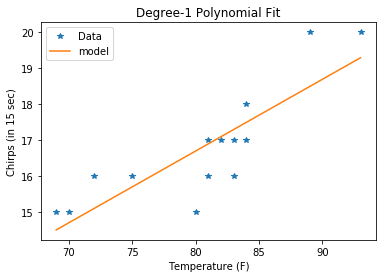

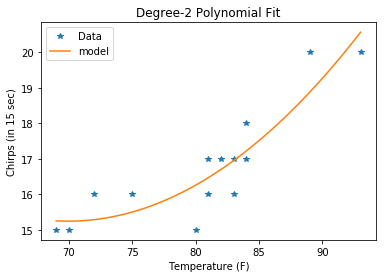

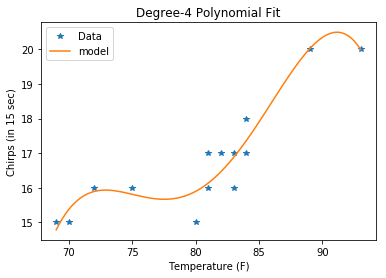

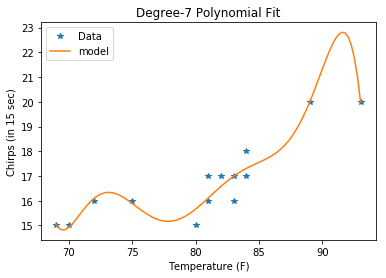

In [4]:
# Plot graphs for polynomials of degrees 1, 2, 4, and 7
for poly_degree in [1,2,4,7]:
    
    # Find the best fit line
    z = np.polyfit(temp, chirp, poly_degree)
    p = np.poly1d(z)

    # Plot the results
    plt.figure()
    plt.plot(temp,chirp,'*')
    plt.title('Degree-'+str(poly_degree)+' Polynomial Fit')
    plt.xlabel('Temperature (F)')
    plt.ylabel('Chirps (in 15 sec)')
    xp = np.linspace(np.min(temp), np.max(temp), 100)
    plt.plot(xp,p(xp))
    plt.legend(['Data','model'])

### Overfitting
As you increase your model's complexity, your training error will decrease. But eventually, your model will "overfit". This means it won't generalize well to data that it hasn't seen yet. One way to prevent overfitting is to train on a portion of your data, reserving some untrained data to check for overfitting. These are referred to as the <B>training</B> and <B>testing sets</B>. 

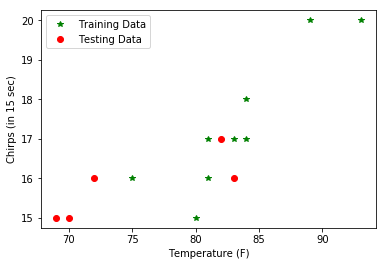

In [5]:
# What if we separated into a training and testing set?

np.random.seed(19) # Random seed for reproducability

# Split data into training set (60%) and testing set (40%)
mask = np.random.rand(len(temp)) < 0.6
temp_train = [temp[i] for i in range(len(temp)) if mask[i]]
chirp_train = [chirp[i] for i in range(len(chirp)) if mask[i]]
temp_test = [temp[i] for i in range(len(temp)) if not mask[i]]
chirp_test = [chirp[i] for i in range(len(chirp)) if not mask[i]]

# Plot the training and testing sets
plt.plot(temp_train,chirp_train,'g*')
plt.plot(temp_test,chirp_test,'ro')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (in 15 sec)')
plt.legend(['Training Data','Testing Data','model'])

Now that we have split the data into a training and testing set, we will train our model using <B>only</B> our training set.

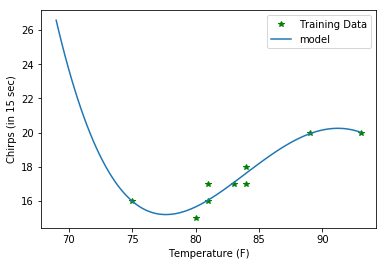

In [6]:
# Choose polynomial degree to use for fit
poly_degree = 4

# Find the best fit line (model)
z = np.polyfit(temp_train, chirp_train, poly_degree)
p = np.poly1d(z)

# Get some data ready for plotting
xp = np.linspace(np.min(temp), np.max(temp), 100)
chirp_train = [chirp[i] for i in range(len(chirp)) if mask[i]]

# Plot the results
plt.plot(temp_train,chirp_train,'g*')
#plt.plot(temp_test,chirp_test,'ro')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (in 15 sec)')
plt.plot(xp,p(xp))
plt.legend(['Training Data','model'])
#plt.legend(['Training Data','Testing Data','model'])

The model appears to fit our training data well. but will this model generalize when presented with unseen data? Let's check with our testing set:

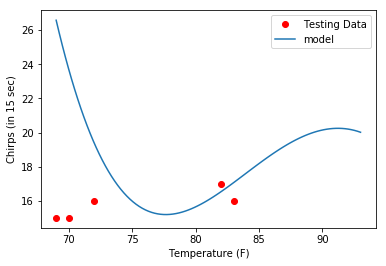

In [7]:
# Plot the results
#plt.plot(temp_train,chirp_train,'g*')
plt.plot(temp_test,chirp_test,'ro')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (in 15 sec)')
plt.plot(xp,p(xp))
plt.legend(['Testing Data','model'])

The model does not do a good job at predicting unseen data, so we can say this model has been <B>overfitted</B>.

When assessing the error of linear regression model, one common way to measure error is to see how far our predicted results (based upon our model) deviate from the actual results. This is visualized below:

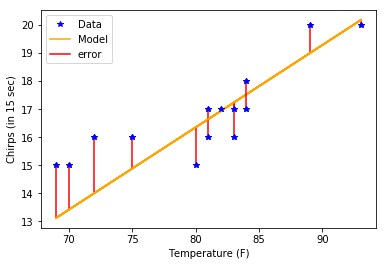

In [8]:
# Get a linear model
poly_degree = 1
z = np.polyfit(temp_train, chirp_train, poly_degree)
p = np.poly1d(z)

# Plot the errors
on_line_pts = p[1]*np.array(temp) + p[0]
plt.plot(temp,chirp,'b*')
for i in range(len(on_line_pts)):
    plt.plot(xp,p(xp),color='orange')
    plt.plot([temp[i]]*2,[chirp[i], on_line_pts[i]],'-r')
plt.plot(temp,chirp,'b*')
plt.legend(['Data','Model','error'])
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (in 15 sec)')

# The Iris Dataset

The iris dataset is one of the most commonly used datasets when teaching machine learning. We'll use the Iris dataset to see some examples of supervised and unsupervised learning

In [9]:
# Import the Iris dataset
iris = datasets.load_iris()

In [10]:
# Print a description of the Iris dataset
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

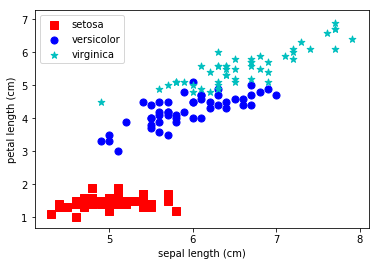

In [11]:
# Rename some variables
X = iris.data
y = iris.target
species_names = iris.target_names
feature_names = iris.feature_names

###############
# PLOT THE DATA
#  (pairwise)
###############

# Choose how each species will be displayed
colors = 'rbc'
markers = 'so*'

# Pick which features to compare
featureA = 0
featureB = 2

# Plot each species
for spec_num in range(len(species_names)):
    mask = (y == spec_num)
    plt.scatter(X[mask, featureA], X[mask, featureB], c=colors[spec_num], marker=markers[spec_num], s=50)
plt.xlabel(feature_names[featureA])
plt.ylabel(feature_names[featureB])
plt.legend(species_names)
plt.rcParams.update({'font.size': 15})

Given that there are four floral features that may be used to calssify the three species, we can only visualize two features in a simple plot. Our Machine Learning algorithms, however, will use all four features to discriminate between species. Let's try a few out. First, we'll split the data into training and testing sets:

In [12]:
# SPLIT the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

We'll start by tryign a <B>Random Forest</B> classifier:

In [13]:
# DEFINE the classifier
model_RF = RandomForestClassifier(n_estimators=200)

# TRAIN the classifier using the training data
model_RF.fit(X_train, y_train)

# Use the trained classifier to PREDICT for the testing set
y_pred = model_RF.predict(X_test)

# PRINT the results
print('Classification Report:')
print(classification_report(y_test,y_pred,target_names=species_names))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.80      0.89        10
  virginica       0.83      1.00      0.91        10

avg / total       0.94      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


Using the <B>sci-kit learn</B> library, it is very easy to switch between classifiers. Now, let's try a <B>Support Vector Machine</B>. Notice the code below is almost exactly the same as the code above, except we have changed the type of our model:

In [14]:
# DEFINE the classifier
model_SVC = SVC(kernel='linear', C=1)
# TRAIN the classifier using the training data
model_SVC.fit(X_train, y_train)

# Use the trained classifier to PREDICT for the testing set
y_pred = model_SVC.predict(X_test)

# PRINT the results
print('Classification Report:')
print(classification_report(y_test,y_pred,target_names=species_names))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Lastly, we'll try using a <B>multilayer perceptron</B>, which is a simple kind of artificial neural network:

In [15]:
# DEFINE the classifier
model_MLP = MLPClassifier(hidden_layer_sizes=100,alpha=1,max_iter=500).fit(X_train, y_train)

# TRAIN the classifier using the training data
model_MLP.fit(X_train, y_train)

# Use the trained classifier to PREDICT for the testing set
y_pred = model_MLP.predict(X_test)

# PRINT the results
print('Classification Report:')
print(classification_report(y_test,y_pred,target_names=species_names))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# Unsupervised Learning

So far, we have assumed the that we know the labels (classes) of our data, but what if we do not? For example, what if we had the floral measurements for the Iris datset, but didn't know which species each measurement came from? We can use <B>unsupervised learning (clustering)</B> to find natural groupings for our data. Below is an implimentation of <B>K-means clustering</B> to split the iris dataset into 3 clusters:

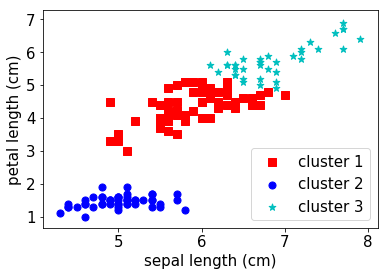

In [16]:
clustering = KMeans(n_clusters=3) # define the model

clustering.fit(X) # Fit the model

clusters = clustering.labels_ # Extract the cluster assignemnt for each data point

# Plot results
for cluster_num in range(3):
    mask = (clusters == cluster_num)
    plt.scatter(X[mask, featureA], X[mask, featureB], c=colors[cluster_num], marker=markers[cluster_num], s=50)
plt.xlabel(feature_names[featureA])
plt.ylabel(feature_names[featureB])
plt.legend(['cluster 1','cluster 2','cluster 3'])

Let's see how well our cluster assignments (above) match up with the actual classes. We'll use a fancy algorithm (hard-coded below) to find the maximal alignment...

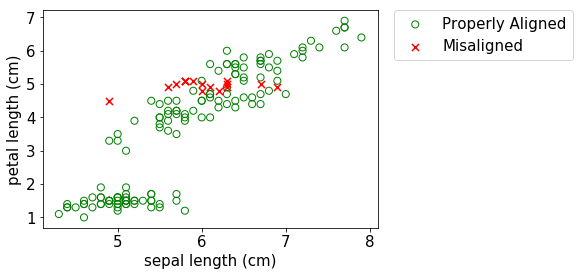

In [18]:
clusters = alignClusters(y,clusters) # align clusters (MUST RUN CELL BELOW FIRST)

# Plot difference between clusters and actual species labels:
plt.scatter(X[clusters==y, featureA], X[clusters==y, featureB], s=50, edgecolors='g', facecolors='none')
plt.scatter(X[clusters!=y, featureA], X[clusters!=y, featureB], s=50, c='r', marker='x')
plt.xlabel(feature_names[featureA])
plt.ylabel(feature_names[featureB])
plt.legend(['Properly Aligned','Misaligned'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In this case, our clustering algorithm has done a pretty good job!

In [17]:
def alignClusters(clstr1,clstr2):
    """Given 2 cluster assignments, this funciton will rename the second to 
       maximize alignment of elements within each cluster. This method is 
       described in in Menéndez, Héctor D. A genetic approach to the graph and 
       spectral clustering problem. MS thesis. 2012. (Assumes cluster labels
       are consecutive integers starting with zero)

       INPUTS:
       clstr1 - The first clustering assignment
       clstr2 - The second clustering assignment

       OUTPUTS:
       clstr2_temp - The second clustering assignment with clusters renumbered to
       maximize alignment with the first clustering assignment """
    K = np.max(clstr1)+1
    simdist = np.zeros((K,K))
    
    for i in range(K):
        for j in range(K):
            dcix = clstr1==i
            dcjx = clstr2==j
            dd = np.dot(dcix.astype(int),dcjx.astype(int))
            simdist[i,j] = (dd/np.sum(dcix!=0) + dd/np.sum(dcjx!=0))/2
    mask = np.zeros((K,K))
    for i in range(K):
        simdist_vec = np.reshape(simdist.T,(K**2,1))
        I = np.argmax(simdist_vec)
        xy = np.unravel_index(I,simdist.shape,order='F')
        x = xy[0]
        y = xy[1]
        mask[x,y] = 1
        simdist[x,:] = 0
        simdist[:,y] = 0
    swapIJ = np.unravel_index(np.where(mask.T),simdist.shape,order='F')
    swapI = swapIJ[0][1,:]
    swapJ = swapIJ[0][0,:]
    clstr2_temp = np.copy(clstr2)
    for k in range(swapI.shape[0]):
        swapj = [swapJ[k]==i for i in clstr2]
        clstr2_temp[swapj] = swapI[k]
    return clstr2_temp

# Final Thoughts

This tutorial is not necessarily meant to be a stand-alone product, but rather to compliment the "Machine Learning in Conservation" workshop. If you have any questions, suggestions, or notice any mistakes/errors, please contact me to let me know. I hope this has shown the ease with which simple machine learning algorithms can be implemented and given you an idea of some of the theory around model complexity and overfitting. 